I'm interested in learning how to use Naive Bayes to classify credit card transactions as fraudulent or not. I'm not 100% sure that Bayes is the best way to analyze this dataset, but it's to learn, and I'll make some comparisons in the future. But from what I understand, one of the standard assumptions of Naive Bayes is that each feature is independent (hence the name 'naive'). Credit card transactions seem to follow this pattern. Let's start by loading in the data and the tools that we will be using.

In [25]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np

transactions = pd.read_csv("creditcard.csv")

In [26]:
print(transactions.columns)
transactions.head()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


First off, let's select the columns that we want to use for the model. We'll start with all of them except for the target (Class).

In [27]:
columns = transactions.columns[0:30]
print(columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


After we've done that, we should split up our data. That way we can use part of the dataset for training, and the other for testing. For now, we'll try using 60% of the data for training, and the rest for testing.

In [28]:
train_rows = int(transactions.shape[0] *.6)
train = transactions.iloc[0:train_rows]
test = transactions.iloc[train_rows:transactions.shape[0]]

Now that we've done that, we can 'fit' our model and make predictions based on that.

In [29]:
gnb = GaussianNB()
gnb.fit(train[columns], train['Class'])
train_predict = gnb.predict(train[columns])
test_predict = gnb.predict(test[columns])
print('Predictions using the training set:\n',train_predict[0:1000], '\n')
print('Predictions using the testing set:\n',test_predict[0:1000])

Predictions using the training set:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

As we can see, what we get back are classifications, where 0 is not a fraud and 1 is a fraudulent purchase. But the question is, how often are we right? Let's graph four different outcomes:
1. True Positive: This is when our model says that the purchase is fraudulent, and that is true.
2. True Negative: This is when our model says that the purchase is not fraudulent, and it is correct.
3. False Positive: This is when our model says that the purchase is fraudulent, and it is not.
4. False Negative: This is when our model says that the purchase is not fraudulent, and in reality it is.

Anytime you make predictions, it is likely that not all of them will be correct. 

C:\Users\bradl\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\bradl\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


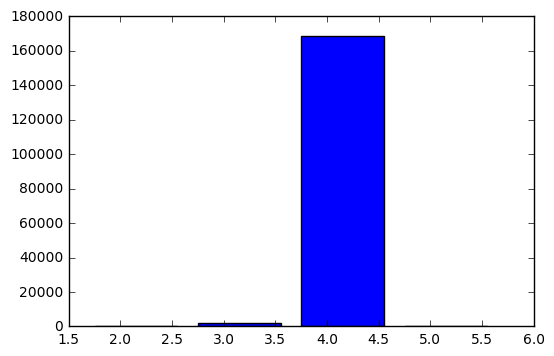

In [30]:
train['predictions'] = train_predict
test['predictions'] = test_predict

def graph_t_f(df):
    positives = df[df['predictions'] == 1]
    t_positives = positives['Class'] == positives['predictions']
    f_positives = positives['Class'] != positives['predictions']
    negatives = df[df['predictions'] == 0]
    t_negatives = negatives['Class'] == negatives['predictions']
    f_negatives = negatives['Class'] != negatives['predictions']
    fig, ax = plt.subplots()
    bar_positions = np.arange(1, 5) + .75
    bar_heights = [t_positives.sum(), f_positives.sum(), t_negatives.sum(), f_negatives.sum()]
    ax.bar(bar_positions, bar_heights)
    plt.show()
    return [t_positives, f_positives, t_negatives, f_negatives]
errors = graph_t_f(train)

As you can see, the differencce between each point is so high, that we really can't compare the graphs. Instead, we should try doing the same thing but adjust the heights to percents instead of raw heights.

[0.13705583756345177, 0.86294416243654826, 0.99962659364497941, 0.00037340635502053734]


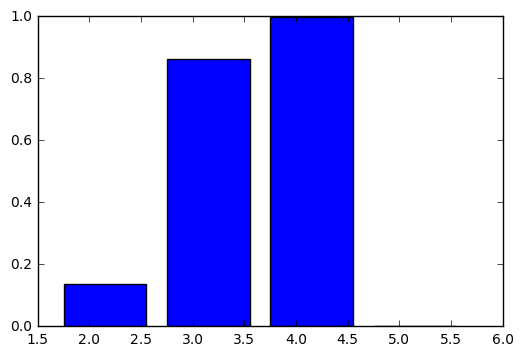

[0.0017380211137379743, 0.010943095901313172, 0.98695021183961051, 0.0003686711453383582]


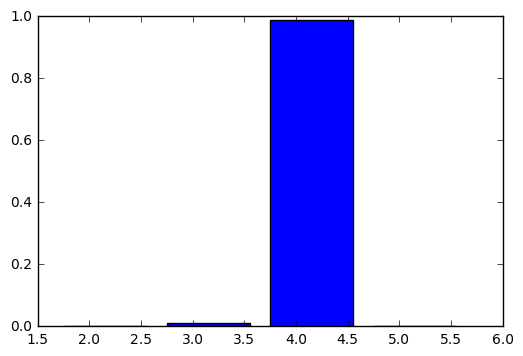

In [31]:
def graph(lst):
    fig, ax = plt.subplots()
    bar_positions = np.arange(1, 5) + .75
    total = lst[0].shape[0] + lst[2].shape[0]
    percents = [p.sum()/p.shape[0] for p in lst]
    print(percents)
    ax.bar(bar_positions, percents)
    plt.show()
    fig, ax = plt.subplots()
    percents = [p.sum()/total for p in lst]
    print(percents)
    ax.bar(bar_positions, percents)
    plt.show()
graph(errors)

In the 1st graph, we see percents for (num of prediction)/(prediction type total) (i.e. true positives/num classified as positive). The order for both is true positives, false positives, true negatives and false negatives.

The 2nd graph is the outcome type (true positive, etc) over the total outcomes.

This tells us that the model looks okay for what we want to do, but it could be improved. The true positive amount is somewhat low. That may not be a surprise, since these events are so rare.  But we also don't want false negatives (that is the worst case scenario), and they do look pretty low. But let's also take a look at an error measure, the ROC score

In [32]:
from sklearn.metrics import roc_auc_score
def get_roc_score(train, test):
    train_auc = roc_auc_score(train['Class'], train['predictions'])
    test_auc = roc_auc_score(test['Class'], test['predictions'])
    return train_auc, test_auc
print (get_roc_score(train, test))

(0.90701690084680153, 0.82736625333579383)


We get a rate that's okay. But an okay rate is just okay, and when it comes to something as serious as credit card fraud, we want to be precise as possible. One thing that might be messing up our scores is the time column. Let's try removing that and rerunning our models.

In [37]:
columns = columns[1:]
gnb = GaussianNB()
train = transactions.iloc[0:train_rows]
test = transactions.iloc[train_rows:transactions.shape[0]]
gnb.fit(train[columns], train['Class'])
train['predictions'] = gnb.predict(train[columns])
test['predictions'] = gnb.predict(test[columns])

C:\Users\bradl\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\bradl\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


To spare you the graphs, right now I'll just calculate the ROC score:

In [38]:
print(get_roc_score(train, test))

(0.91237610085514198, 0.88325752982008754)


Both scores went up, but especially the testing data. That means there is less overfitting happening and so the model has improved overall.

In [41]:
print(gnb.score(train[columns], train['Class']))

0.980021535076
